In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from pmdarima import auto_arima

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19312\3166362503.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "month": pd.date_range(start="2020-01-01", periods=36, freq="M"),


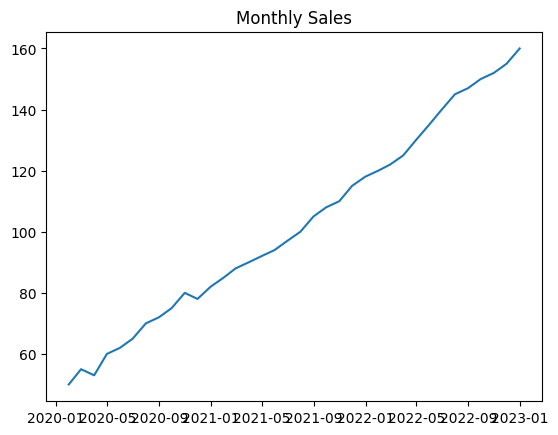

In [2]:
# Monthly sales for 3 years
data = {
    "month": pd.date_range(start="2020-01-01", periods=36, freq="M"),
    "sales": [50, 55, 53, 60, 62, 65, 70, 72, 75, 80, 78, 82,
              85, 88, 90, 92, 94, 97, 100, 105, 108, 110, 115, 118,
              120, 122, 125, 130, 135, 140, 145, 147, 150, 152, 155, 160]
}
df = pd.DataFrame(data)
df.set_index("month", inplace=True)

plt.plot(df.sales)
plt.title("Monthly Sales")
plt.show()

In [3]:
model =auto_arima(
    df.sales,
    trace=True,
    seasonal=False,
    error_action='ignore',
    suppress_warnings=True
)

model.summary

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=142.739, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=145.350, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=142.727, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=143.208, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=191.633, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=144.721, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=144.724, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=146.726, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=174.957, Time=0.03 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.015 seconds


<bound method ARIMA.summary of ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True)>

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19312\1095642340.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates =pd.date_range(df.index[-1]+pd.DateOffset(months=1),periods=n_periods, freq='M')


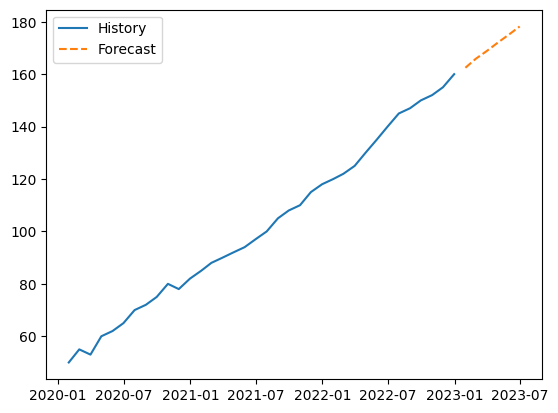

In [4]:
n_periods =6
forecast =model.predict(n_periods=n_periods)

future_dates =pd.date_range(df.index[-1]+pd.DateOffset(months=1),periods=n_periods, freq='M')

forecast_df =pd.DataFrame({'forecast':forecast},index=future_dates)

plt.plot(df.sales, label="History")
plt.plot(forecast_df.forecast, label="Forecast", linestyle="--")
plt.legend()
plt.show()
